# **Library & Import**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os.path as osp

In [2]:
data_folder = osp.join('..', '..', 'Dataset')
imdb_df = pd.read_csv(osp.join(data_folder, 'imdb_top_1000.csv'))
imdb_df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# **Information**

In [3]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
imdb_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


# **Preprocessing**

In [5]:
# Column 'Certificate'
# Filling missing with 'Not Rated'
filled = imdb_df.copy(True)
filled['Certificate'] = filled['Certificate'].fillna('Not Rated')

filled = filled.drop(np.argwhere(filled['Released_Year'] == 'PG')[:, 0])
filled['Released_Year'] = filled['Released_Year'].astype(int)

gross_mask = filled['Gross'].isna()
meta_mask = filled['Meta_score'].isna()
non_missing = filled[~gross_mask & ~meta_mask].copy(True)
non_missing.reset_index(inplace=True, drop=True);

In [6]:
non_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    749 non-null    object 
 1   Series_Title   749 non-null    object 
 2   Released_Year  749 non-null    int32  
 3   Certificate    749 non-null    object 
 4   Runtime        749 non-null    object 
 5   Genre          749 non-null    object 
 6   IMDB_Rating    749 non-null    float64
 7   Overview       749 non-null    object 
 8   Meta_score     749 non-null    float64
 9   Director       749 non-null    object 
 10  Star1          749 non-null    object 
 11  Star2          749 non-null    object 
 12  Star3          749 non-null    object 
 13  Star4          749 non-null    object 
 14  No_of_Votes    749 non-null    int64  
 15  Gross          749 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 90.8+ KB


In [7]:
# Column 'Released_Year'
non_missing['Gross'] = non_missing['Gross'].str.replace(',', '').astype(float, copy=True)
non_missing['Runtime'] = non_missing['Runtime'].str[:-3].astype(int)
non_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    749 non-null    object 
 1   Series_Title   749 non-null    object 
 2   Released_Year  749 non-null    int32  
 3   Certificate    749 non-null    object 
 4   Runtime        749 non-null    int32  
 5   Genre          749 non-null    object 
 6   IMDB_Rating    749 non-null    float64
 7   Overview       749 non-null    object 
 8   Meta_score     749 non-null    float64
 9   Director       749 non-null    object 
 10  Star1          749 non-null    object 
 11  Star2          749 non-null    object 
 12  Star3          749 non-null    object 
 13  Star4          749 non-null    object 
 14  No_of_Votes    749 non-null    int64  
 15  Gross          749 non-null    float64
dtypes: float64(3), int32(2), int64(1), object(10)
memory usage: 87.9+ KB


In [8]:
meta_missing = filled[meta_mask].copy(True)

# drop null values
meta_missing = meta_missing.drop('Meta_score', axis=1)
meta_missing = meta_missing[~meta_missing['Gross'].isna()]

meta_missing['Gross'] = meta_missing['Gross'].str.replace(',', '').astype(float)
meta_missing['Runtime'] = meta_missing['Runtime'].str[:-3].astype(int)


meta_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 57 to 871
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    81 non-null     object 
 1   Series_Title   81 non-null     object 
 2   Released_Year  81 non-null     int32  
 3   Certificate    81 non-null     object 
 4   Runtime        81 non-null     int32  
 5   Genre          81 non-null     object 
 6   IMDB_Rating    81 non-null     float64
 7   Overview       81 non-null     object 
 8   Director       81 non-null     object 
 9   Star1          81 non-null     object 
 10  Star2          81 non-null     object 
 11  Star3          81 non-null     object 
 12  Star4          81 non-null     object 
 13  No_of_Votes    81 non-null     int64  
 14  Gross          81 non-null     float64
dtypes: float64(2), int32(2), int64(1), object(10)
memory usage: 9.5+ KB


In [9]:
gross_missing = filled[gross_mask].copy(True)

# drop null values
gross_missing = gross_missing.drop('Gross', axis=1)
gross_missing = gross_missing[~gross_missing['Meta_score'].isna()]

gross_missing['Runtime'] = gross_missing['Runtime'].str[:-3].astype(int)

gross_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 18 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    93 non-null     object 
 1   Series_Title   93 non-null     object 
 2   Released_Year  93 non-null     int32  
 3   Certificate    93 non-null     object 
 4   Runtime        93 non-null     int32  
 5   Genre          93 non-null     object 
 6   IMDB_Rating    93 non-null     float64
 7   Overview       93 non-null     object 
 8   Meta_score     93 non-null     float64
 9   Director       93 non-null     object 
 10  Star1          93 non-null     object 
 11  Star2          93 non-null     object 
 12  Star3          93 non-null     object 
 13  Star4          93 non-null     object 
 14  No_of_Votes    93 non-null     int64  
dtypes: float64(2), int32(2), int64(1), object(10)
memory usage: 10.9+ KB


In [10]:
total = non_missing.shape[0]\
        + meta_missing.shape[0]\
        + gross_missing.shape[0]
print(f"{total=}")

total=923


# Save preprocessed data

In [11]:
meta_missing.to_csv(osp.join(data_folder, 'imdb_no_meta.csv'), index=False)
gross_missing.to_csv(osp.join(data_folder, 'imdb_no_gross.csv'), index=False)
non_missing.to_csv(osp.join(data_folder, 'imdb_nona.csv'), index=False)

In [13]:
meta_missing.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
57,https://m.media-amazon.com/images/M/MV5BMTQ4Mz...,Dangal,2016,U,161,"Action, Biography, Drama",8.4,Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh,Sanya Malhotra,156479,12391761.0
65,https://m.media-amazon.com/images/M/MV5BMDhjZW...,Taare Zameen Par,2007,U,165,"Drama, Family",8.4,An eight-year-old boy is thought to be a lazy ...,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan,Tisca Chopra,168895,1223869.0
71,https://m.media-amazon.com/images/M/MV5BMGFkNW...,Once Upon a Time in America,1984,A,229,"Crime, Drama",8.4,A former Prohibition-era Jewish gangster retur...,Sergio Leone,Robert De Niro,James Woods,Elizabeth McGovern,Treat Williams,311365,5321508.0
79,https://m.media-amazon.com/images/M/MV5BNDQwOD...,Witness for the Prosecution,1957,U,116,"Crime, Drama, Mystery",8.4,A veteran British barrister must defend his cl...,Billy Wilder,Tyrone Power,Marlene Dietrich,Charles Laughton,Elsa Lanchester,108862,8175000.0
83,https://m.media-amazon.com/images/M/MV5BMmExYW...,The Great Dictator,1940,Passed,125,"Comedy, Drama, War",8.4,Dictator Adenoid Hynkel tries to expand his em...,Charles Chaplin,Charles Chaplin,Paulette Goddard,Jack Oakie,Reginald Gardiner,203150,288475.0


# Split Genre

In [ ]:
# split genre
non_missing['Genre'] = non_missing['Genre'].str.strip()
genre_df = non_missing['Genre'].str.get_dummies(sep=', ')

non_missing = pd.concat([non_missing, genre_df], axis=1)


In [15]:
non_missing.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0,0,0,0,0,0,0,0,0,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0,0,0,0,0,0,0,0,0,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,0,0,0,0,0,0,0,0,0,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,0,0,0,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,0,0,0,0,0,0,0,0,0,0


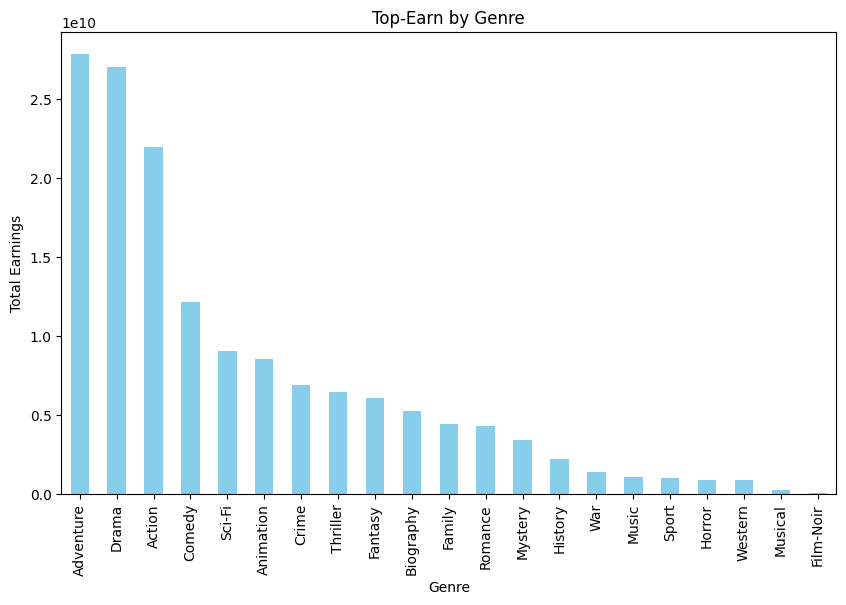

In [ ]:
# Top-earn by Genre
genre_earn = genre_df.mul(non_missing['Gross'], axis=0).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_earn.plot(kind='bar', color='skyblue')
plt.title('Top-Earn by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Earnings')
plt.show()